In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [8]:
df1 = df.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df1.shape
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [11]:
df3 = df1.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3.shape

(13246, 5)

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-16-4c4c73fbe7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [24]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [36]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if(len(tokens)==2):
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return x

In [29]:
convert_sqft_to_num('810-810')

810.0

In [37]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [38]:
df4.loc[410]

location             Kengeri
size                   1 BHK
total_sqft    34.46Sq. Meter
bath                       1
price                   18.5
bhk                        1
Name: 410, dtype: object

In [60]:
# df5=df4.copy()
df4=df4.drop(['size'], axis='columns')

df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   total_sqft  13246 non-null  object 
 2   bath        13246 non-null  float64
 3   price       13246 non-null  float64
 4   bhk         13246 non-null  int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 1.2+ MB


In [61]:
# df4.drop(['size'], axis='columns')
print(df4[~df4['total_sqft'].apply(is_float)].count())
df4[~df4['total_sqft'].apply(is_float)]

location      46
total_sqft    46
bath          46
price         46
bhk           46
dtype: int64


,location,total_sqft,bath,price,bhk
410,Kengeri,34.46Sq. Meter,1.0,18.50,1
648,Arekere,4125Perch,9.0,265.00,9
775,Basavanagara,1000Sq. Meter,2.0,93.00,1
872,Singapura Village,1100Sq. Yards,2.0,45.00,2
1019,Marathi Layout,5.31Acres,1.0,110.00,1
1086,Narasapura,30Acres,2.0,29.50,2
1400,Chamrajpet,716Sq. Meter,9.0,296.00,9
1712,Singena Agrahara,1500Sq. Meter,3.0,95.00,3
1743,Hosa Road,142.61Sq. Meter,3.0,115.00,3
1821,Sarjapur,1574Sq. Yards,3.0,76.00,3


In [67]:
#Grounds, Sq. Meter, Acres, Guntha, Sq. Yards, Cents
if 'Cents' in '3Cents':
    print('True')
    x='3Cents'
    
    print(toekn)
else:
    print('Flase')

True
['3', 'ents']


In [72]:
def convert_to_sqft(x):
    try:
        if 'Cents' in x:
            token=x.split('C')
            num=float(token[0])
            conv=num*435.56
            return float(conv)
        elif 'Sq. Meter' in x:
            token=x.split('S')
            num=float(token[0])
            conv=num*10.7639
            return float(conv)
        elif 'Acres' in x:
            token=x.split('A')
            num=float(token[0])
            conv=num*43560
            return float(conv)
        elif 'Guntha' in x:
            token=x.split('G')
            num=float(token[0])
            conv=num*1089
            return float(conv)
        elif 'Sq. Yards' in x:
            token=x.split('S')
            num=float(token[0])
            conv=num*9
            return float(conv)
    except:
        return x

    

In [73]:
df4['total_sqft']=df4['total_sqft'].apply(convert_to_sqft)

In [74]:
print(df4[~df4['total_sqft'].apply(is_float)].count())
df4[~df4['total_sqft'].apply(is_float)]

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64


,location,total_sqft,bath,price,bhk


In [75]:
df4.loc[410]

location      Kengeri
total_sqft    370.924
bath                1
price            18.5
bhk                 1
Name: 410, dtype: object

In [76]:
df5 = df4.copy()
df5['price_per_sqft']=(df5['price']*100000)/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [78]:
len(df5.location.unique())

1304

In [79]:
df5.location=df5.location.apply(lambda x: x.strip())

In [80]:
len(df5.location.unique())

1293

In [82]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [85]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [86]:
len(location_stats[location_stats<=10])

1052

In [87]:
len(df5.location.unique())

1293

In [88]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [89]:
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [90]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [91]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6[df6.total_sqft/df6.bhk<300].head()

,location,total_sqft,bath,price,bhk,price_per_sqft


In [96]:
print(df6.shape)
df6.price_per_sqft.describe()


(12498, 6)


count     12496.000000
mean       6299.744282
std        4168.908367
min           2.257423
25%        4204.149169
50%        5291.005291
75%        6916.749012
max      176470.588235
Name: price_per_sqft, dtype: float64

In [99]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10267, 6)

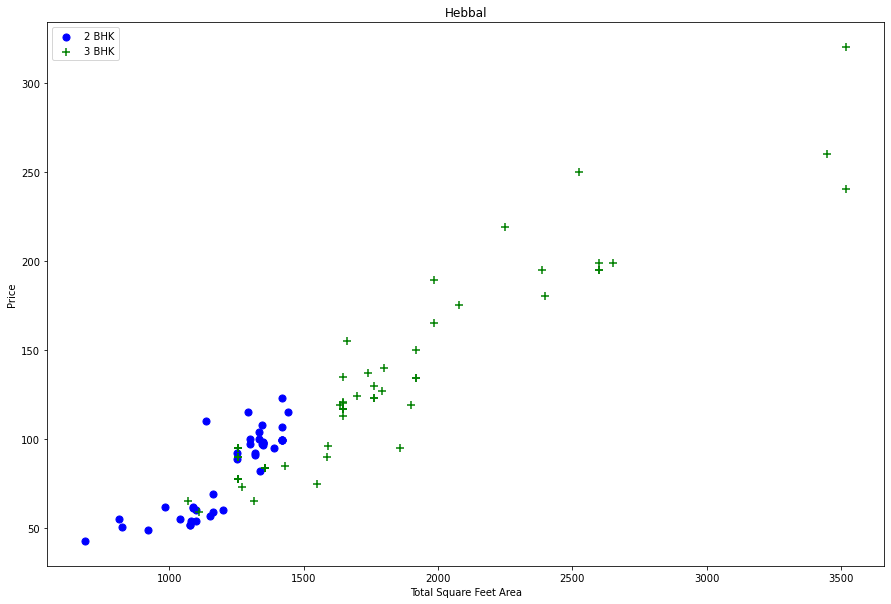

In [103]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, "Hebbal")

#{
'1': {
    'mean': 4000,
    'std':2000,
    'count': 34
    }
    '2': {
    'mean': 4300,
    'std':2300,
    'count': 22
    }
}


In [104]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        print("Location", location)
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            print("BHK", bhk)
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
        
    return df.drop(exclude_indices, axis='index')
df8 = remove_bhk_outliers(df7)

Location 1st Block Jayanagar
BHK 2
BHK 3
BHK 4
Location 1st Phase JP Nagar
BHK 1
BHK 2
BHK 3
BHK 4
BHK 5
Location 2nd Phase Judicial Layout
BHK 2
BHK 3
Location 2nd Stage Nagarbhavi
BHK 4
BHK 6
Location 5th Block Hbr Layout
BHK 2
BHK 3
BHK 5
BHK 6
Location 5th Phase JP Nagar
BHK 1
BHK 2
BHK 3
BHK 5
Location 6th Phase JP Nagar
BHK 2
BHK 3
BHK 4
Location 7th Phase JP Nagar
BHK 1
BHK 2
BHK 3
BHK 4
Location 8th Phase JP Nagar
BHK 1
BHK 2
BHK 3
BHK 4
BHK 5
Location 9th Phase JP Nagar
BHK 1
BHK 2
BHK 3
BHK 4
Location AECS Layout
BHK 2
BHK 3
Location Abbigere
BHK 1
BHK 2
BHK 3
BHK 6
BHK 8
Location Akshaya Nagar
BHK 2
BHK 3
Location Ambalipura
BHK 1
BHK 2
BHK 3
BHK 4
Location Ambedkar Nagar
BHK 2
BHK 3
BHK 4
Location Amruthahalli
BHK 1
BHK 2
BHK 3
Location Anandapura
BHK 2
BHK 3
BHK 4
Location Ananth Nagar
BHK 1
BHK 2
BHK 3
Location Anekal
BHK 1
BHK 2
BHK 3
BHK 4
Location Anjanapura
BHK 2
BHK 3
BHK 4
Location Ardendale
BHK 2
BHK 3
BHK 4
Location Arekere
BHK 1
BHK 2
BHK 3
BHK 4
Location Attibel

Location Sompura
BHK 2
BHK 3
BHK 4
Location Sonnenahalli
BHK 1
BHK 2
BHK 3
Location Subramanyapura
BHK 2
BHK 3
Location Sultan Palaya
BHK 2
BHK 3
BHK 4
Location TC Palaya
BHK 1
BHK 2
BHK 3
BHK 4
Location Talaghattapura
BHK 2
BHK 3
Location Thanisandra
BHK 1
BHK 2
BHK 3
BHK 4
BHK 6
Location Thigalarapalya
BHK 2
BHK 3
BHK 4
Location Thubarahalli
BHK 2
BHK 3
BHK 4
Location Thyagaraja Nagar
BHK 1
BHK 2
BHK 3
BHK 5
BHK 7
Location Tindlu
BHK 2
BHK 3
BHK 7
Location Tumkur Road
BHK 2
BHK 3
Location Ulsoor
BHK 2
BHK 3
BHK 4
Location Uttarahalli
BHK 1
BHK 2
BHK 3
BHK 4
BHK 6
Location Varthur
BHK 2
BHK 3
Location Varthur Road
BHK 2
BHK 3
Location Vasanthapura
BHK 2
Location Vidyaranyapura
BHK 2
BHK 3
BHK 4
Location Vijayanagar
BHK 1
BHK 2
BHK 3
BHK 4
BHK 5
Location Vishveshwarya Layout
BHK 1
BHK 4
BHK 6
Location Vishwapriya Layout
BHK 2
Location Vittasandra
BHK 2
BHK 3
Location Whitefield
BHK 1
BHK 2
BHK 3
BHK 4
BHK 5
Location Yelachenahalli
BHK 2
BHK 3
Location Yelahanka
BHK 1
BHK 2
BHK 3
BHK 4


In [107]:
df8.shape

(7343, 6)

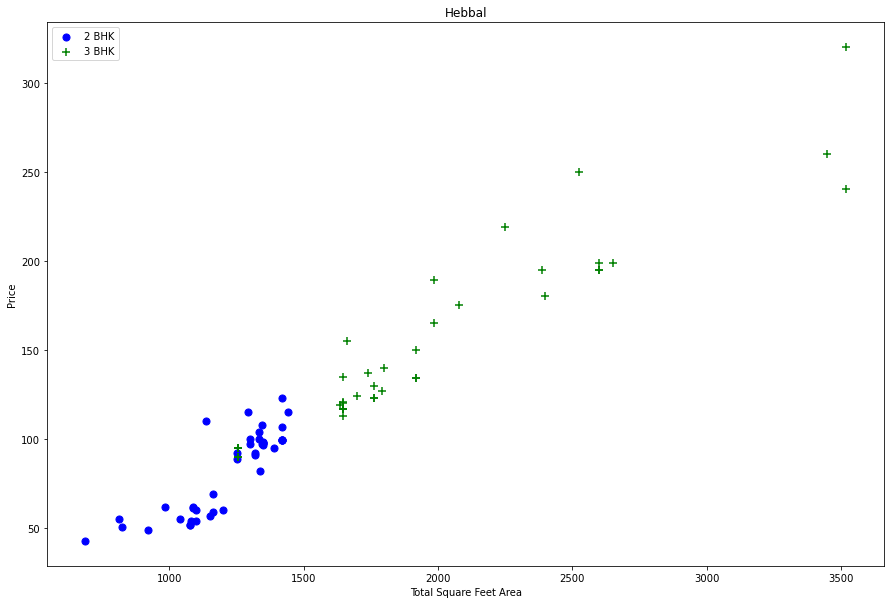

In [108]:
plot_scatter_chart(df8, "Hebbal")

Text(0, 0.5, 'Count')

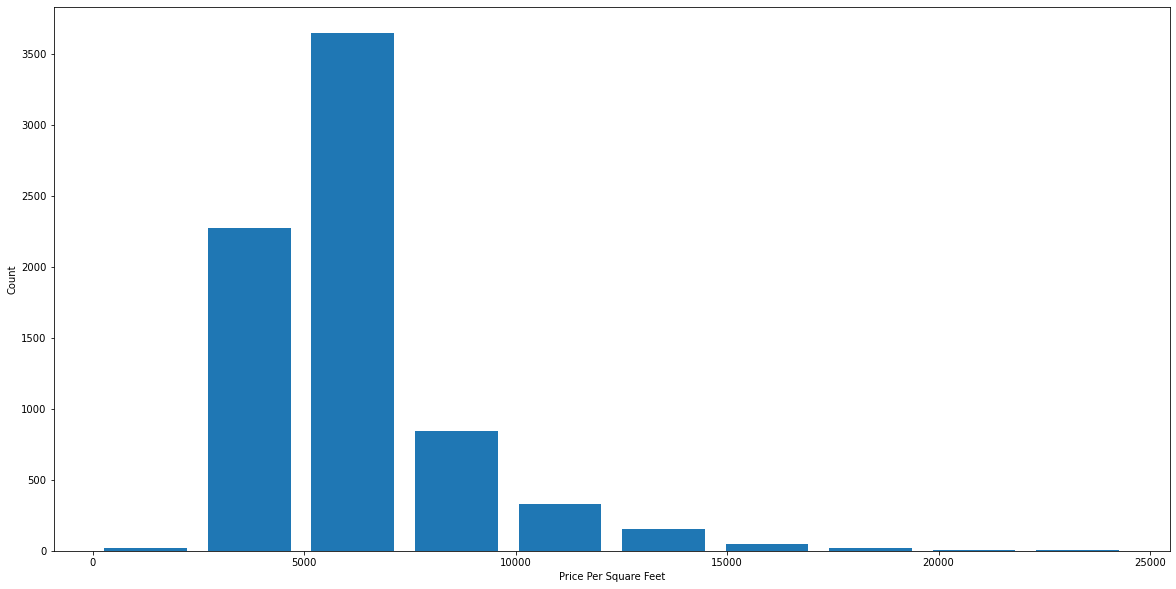

In [109]:
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [110]:
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [112]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [113]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5290,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8506,other,12000.0,12.0,525.0,10,4375.000000
8595,other,10000.0,16.0,550.0,16,5500.000000
9331,other,6000.0,12.0,150.0,11,2500.000000
9663,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

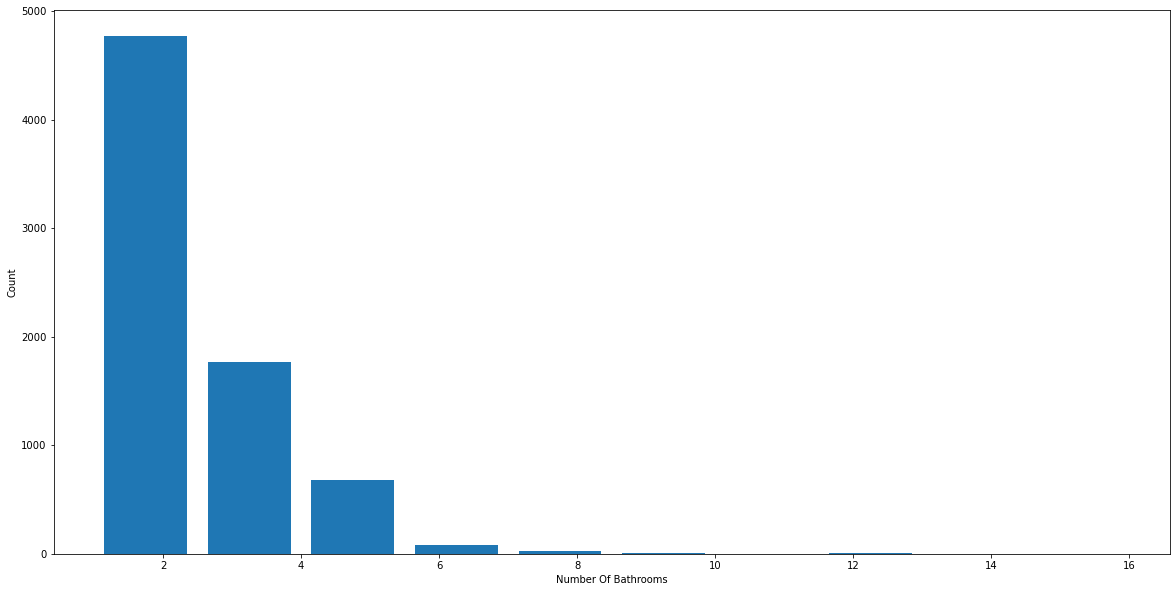

In [114]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number Of Bathrooms")
plt.ylabel("Count")

In [116]:
df8[df8["bath"]>df8["bhk"]+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1631,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5251,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6726,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8430,other,11338.0,9.0,1000.0,6,8819.897689


In [117]:
df9 = df8[df8["bath"]<df8["bhk"]+2]
df9.shape

(7265, 6)

In [118]:
df10 = df9.drop(['price_per_sqft'], axis="columns")
df10.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [119]:
dummies = pd.get_dummies(df10.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
df11 = pd.concat([df10, dummies.drop("other", axis="columns")], axis="columns")
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df12 = df11.drop('location', axis="columns")
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
df12.shape


(7265, 245)

In [124]:
X = df12.drop('price', axis="columns")
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [194]:
from sklearn.model_selection import train_test_split
#Test_size = 0.2 tells that 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)
# X_train
# X_test
# y_train
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.7180313930461519

In [195]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score


cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([-111.91322171,    0.46508124,    0.69396312,  -89.67041708,
       -107.33090374])

In [204]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-61.551100,{'normalize': True}
1,lasso,-79.360007,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.704077,"{'criterion': 'mse', 'splitter': 'random'}"


In [206]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [207]:
print(np.where(X.columns=='Vijayanagar')[0])
print(np.where(X.columns=='Vijayanagar')[0][0])

[234]
234


In [242]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
#     print(np.where(X.columns==location)[0])
#     print(np.where(X.columns==location)[0][0])
    
#     print(X)
    x = np.zeros(len(X.columns))
#     print(x)
#     nsamples, nx, ny = X.shape
#     print(nsamples, nx, ny)
#     d2_train_dataset = train_dataset.reshape((nsamples,nx*ny))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
#     print(x[0], x[1], x[2])
#     print(x)
    if loc_index >= 0:
        x[loc_index] = 1
    return(lr_clf.predict([x])[0])

In [243]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

97.57012549161523

In [244]:
predict_price('1st Phase JP Nagar', 1000, 3, 3)

147.53718608073922

In [245]:
predict_price('Indira Nagar', 1000, 2, 2)

200.36441839423003

In [250]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [252]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))